This file contains the results of the CalibrationV3_1.ipynb file. As LR was performed on the nonlinear data, the results regarding identification rates are worse than the results obtained in CalibrationV3_results.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
tsv_file_path_1 = '20210120_HM_HEK_IAA_300minGr_R1.tsv'
tsv_file_path_2 = '20210120_HM_HEK_IAA_300minGr_R1_Calibrated.tsv'
df1 = pd.read_csv(tsv_file_path_1, sep='\t')
df2 = pd.read_csv(tsv_file_path_2, sep='\t')

In [2]:
dimensions1 = df1.shape
print(dimensions1)
dimensions2 = df2.shape
print(dimensions2)

(60108, 36)
(57078, 36)


In [3]:
df1q = df1[df1["spectrum_q"] < 0.01]
dimensions1q = df1q.shape
print(dimensions1q)
df2q = df2[df2["spectrum_q"] < 0.01]
dimensions2q = df2q.shape
print(dimensions2q)

(46806, 36)
(46170, 36)


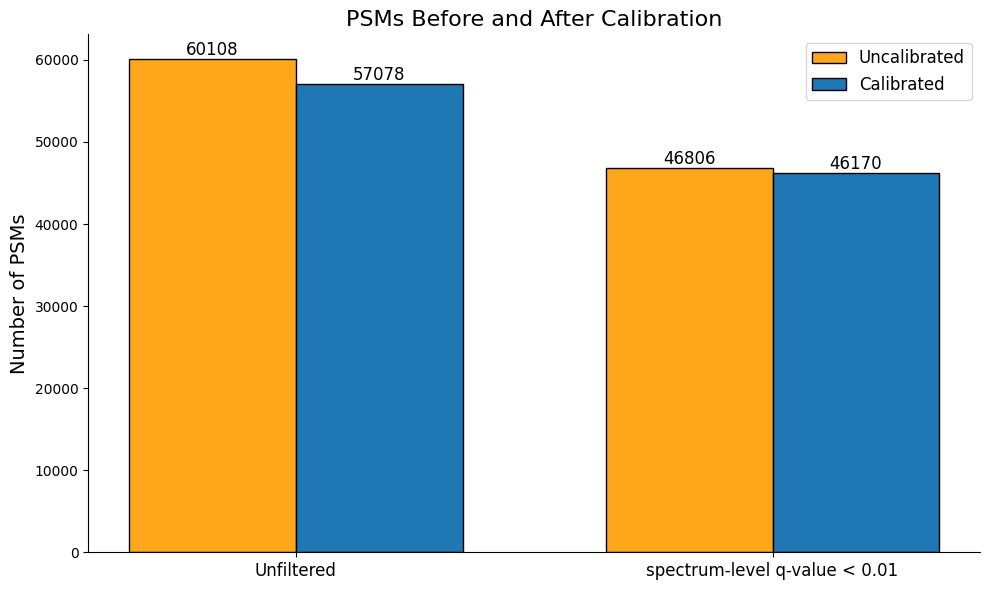

In [4]:
import matplotlib.pyplot as plt

# Data
psms_uncalibrated = [len(df1), len(df1q)]
psms_calibrated = [len(df2), len(df2q)]
labels = ['Unfiltered', 'spectrum-level q-value < 0.01']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(labels))

bar1 = ax.bar(index, psms_uncalibrated, bar_width, label='Uncalibrated', color='#FFA71B', edgecolor='black')
bar2 = ax.bar([i + bar_width for i in index], psms_calibrated, bar_width, label='Calibrated', edgecolor='black')

# Add labels, title, and legend
ax.set_ylabel('Number of PSMs', fontsize=14)
ax.set_title('PSMs Before and After Calibration', fontsize=16)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=12)

# Add amounts above the bars
for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height(), str(psms_uncalibrated[i]), ha='center', va='bottom', fontsize=12)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width() / 2.0, bar.get_height(), str(psms_calibrated[i]), ha='center', va='bottom', fontsize=12)

# Remove unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()

In [5]:
merged_df = pd.merge(df1q, df2q, on=['peptide', 'scannr'], how='inner')
merged_df.head(5)

,peptide,proteins_x,num_proteins_x,filename_x,scannr,rank_x,label_x,expmass_x,calcmass_x,charge_x,peptide_len_x,missed_cleavages_x,isotope_error_x,precursor_ppm_x,fragment_ppm_x,hyperscore_x,delta_next_x,delta_best_x,rt_x,aligned_rt_x,predicted_rt_x,delta_rt_model_x,matched_peaks_x,longest_b_x,longest_y_x,longest_y_pct_x,matched_intensity_pct_x,scored_candidates_x,poisson_x,sage_discriminant_score_x,posterior_error_x,spectrum_q_x,peptide_q_x,protein_q_x,ms1_intensity_x,ms2_intensity_x,proteins_y,num_proteins_y,filename_y,rank_y,label_y,expmass_y,calcmass_y,charge_y,peptide_len_y,missed_cleavages_y,isotope_error_y,precursor_ppm_y,fragment_ppm_y,hyperscore_y,delta_next_y,delta_best_y,rt_y,aligned_rt_y,predicted_rt_y,delta_rt_model_y,matched_peaks_y,longest_b_y,longest_y_y,longest_y_pct_y,matched_intensity_pct_y,scored_candidates_y,poisson_y,sage_discriminant_score_y,posterior_error_y,spectrum_q_y,peptide_q_y,protein_q_y,ms1_intensity_y,ms2_intensity_y
0,VSHVSTGGGASLELLEGK,tr|A0A140VJR3|A0A140VJR3_HUMAN,1,20210120_HM_HEK_IAA_300minGr_R1.mzML,controllerType=0 controllerNumber=1 scan=20762,1,1,1739.9047,1739.9056,2,18,0,0.0,0.561273,4.512378,80.898759,57.306250,0.0,106.39572,0.358235,0.444003,0.085768,28,7,15,0.833333,52.370990,27,-22.036961,3.051130,-324.0,0.000159,0.000292,0.001187,17372374.0,2015707.5,tr|V9HWF4|V9HWF4_HUMAN,1,20210120_HM_HEK_IAA_300minGr_R1_Calibrated.mzML,1,1,1739.9047,1739.9056,2,18,0,0.0,0.561273,4.455534,80.898759,57.438730,0.0,106.39572,0.358235,0.456677,0.098442,28,7,15,0.833333,52.370990,60,-24.380759,2.110330,-324.0,0.000087,0.000180,0.000673,17372374.0,2015707.5
1,HIADLAGNSEVILPVPAFNVINGGSHAGNK,tr|A0A2R8YEM5|A0A2R8YEM5_HUMAN,1,20210120_HM_HEK_IAA_300minGr_R1.mzML,controllerType=0 controllerNumber=1 scan=59286,1,1,3010.5667,3010.5623,4,30,0,0.0,1.459703,3.733232,91.211309,91.211309,0.0,206.77390,0.696208,0.741128,0.044919,29,12,17,0.566667,55.617220,23,-21.322521,2.981234,-324.0,0.000159,0.000292,0.001187,432567550.0,83529656.0,tr|A0A2R8Y6G6|A0A2R8Y6G6_HUMAN,1,20210120_HM_HEK_IAA_300minGr_R1_Calibrated.mzML,1,1,3010.5667,3010.5623,4,30,0,0.0,1.459703,5.132765,88.673923,88.673923,0.0,206.77390,0.696208,0.730726,0.034517,28,10,17,0.566667,55.421276,41,-22.241012,2.152907,-324.0,0.000087,0.000180,0.000673,432567550.0,83235360.0
2,HIADLAGNSEVILPVPAFNVINGGSHAGNK,tr|A0A2R8YEM5|A0A2R8YEM5_HUMAN,1,20210120_HM_HEK_IAA_300minGr_R1.mzML,controllerType=0 controllerNumber=1 scan=59470,1,1,3010.5623,3010.5623,4,30,0,0.0,0.000000,3.123588,87.483751,87.483751,0.0,207.29668,0.697969,0.741128,0.043159,29,12,17,0.566667,48.368570,11,-16.460864,2.966786,-324.0,0.000159,0.000292,0.001187,95504160.0,13040154.0,tr|A0A2R8Y6G6|A0A2R8Y6G6_HUMAN,1,20210120_HM_HEK_IAA_300minGr_R1_Calibrated.mzML,1,1,3010.5623,3010.5623,4,30,0,0.0,0.000000,4.536250,84.606224,84.606224,0.0,207.29668,0.697969,0.730726,0.032757,28,12,13,0.433333,47.977303,43,-22.386818,2.092094,-324.0,0.000087,0.000180,0.000673,95504160.0,12934669.0
3,SADESGQALLAAGHYASDEVR,tr|A0A0D9SF54|A0A0D9SF54_HUMAN;tr|A0A0D9SFF6|A...,4,20210120_HM_HEK_IAA_300minGr_R1.mzML,controllerType=0 controllerNumber=1 scan=29517,1,1,2145.9910,2145.9927,2,21,0,0.0,0.796361,4.024200,81.779226,63.839595,0.0,128.34155,0.432126,0.390783,0.041344,29,11,14,0.666667,51.264275,10,-16.229365,2.950630,-324.0,0.000159,0.000292,0.001187,8474093.0,1180256.4,tr|A0A994J7B0|A0A994J7B0_HUMAN;tr|B4DGT1|B4DGT...,2,20210120_HM_HEK_IAA_300minGr_R1_Calibrated.mzML,1,1,2145.9910,2145.9927,2,21,0,0.0,0.796361,4.270380,81.779226,59.640855,0.0,128.34155,0.432126,0.428665,0.003461,29,11,14,0.666667,51.264275,17,-20.069367,2.352605,-324.0,0.000097,0.000176,0.000513,8474093.0,1180256.4
4,DLSAAGIGLLAAATQSLSMPASLGR,tr|A0A0R4J2E8|A0A0R4J2E8_HUMAN;tr|A0A1B0GX04|A...,2,20210120_HM_HEK_IAA_300minGr_R1.mzML,controllerType=0 controllerNumber=1 scan=87181,1,1,2370.2590,2370.2576,2,25,0,0.0,0.618010,4.127809,84.998809,54.519394,0.0,292.91214,0.986236,0.972109,0.014127,28,13,15,0.600000,59.573494,45,-22.521459,2.929744,-324.0,0.000

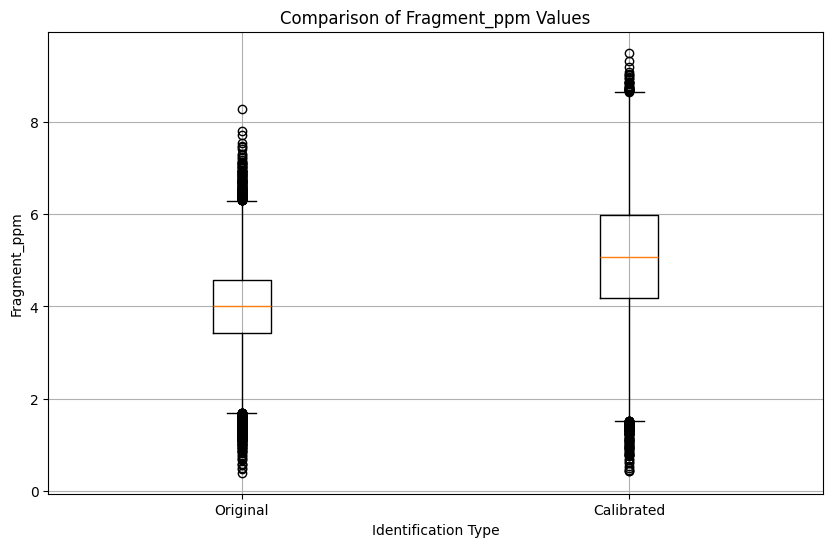

In [6]:
import matplotlib.pyplot as plt

# Extract fragment_ppm values for original (_x) and calibrated (_y) identifications
fragment_ppm_x = merged_df['fragment_ppm_x']
fragment_ppm_y = merged_df['fragment_ppm_y']

# Create a figure and axes for the plot
plt.figure(figsize=(10, 6))

# Create a boxplot to compare the distributions of fragment_ppm values
plt.boxplot([fragment_ppm_x, fragment_ppm_y], labels=['Original', 'Calibrated'])

# Set labels and title
plt.xlabel('Identification Type')
plt.ylabel('Fragment_ppm')
plt.title('Comparison of Fragment_ppm Values')

# Show plot
plt.grid(True)
plt.show()

In [7]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(fragment_ppm_x, fragment_ppm_y)

# Print the test statistic and p-value
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

# Determine the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference between the distributions.")


Mann-Whitney U statistic: 503036617.5
p-value: 0.0
Reject the null hypothesis: There is a statistically significant difference between the distributions.


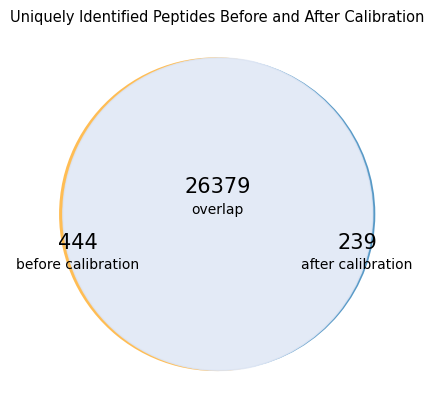

In [8]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Get the sets of unique peptides in each dataframe
peptides_df1q = set(df1q['peptide'].unique())
peptides_df2q = set(df2q['peptide'].unique())

# Create the Venn diagram with specified colors and without set labels
venn = venn2([peptides_df1q, peptides_df2q], set_colors=('#FFA71B', '#1F77B4'))

# Set overlap color (slightly darker)
overlap_color = '#DAE3F3'  # Reducing RGB values slightly
venn.get_patch_by_id('11').set_color(overlap_color)

# Set transparency of circles
for patch in venn.patches:
    patch.set_alpha(0.75)  # Set transparency of circles to 0.5

# Add label for the overlap
plt.text(0, 0.02, 'overlap', fontsize=10, color='black', ha='center', va='center')

plt.text(-0.5, -0.18, 'before calibration', fontsize=10, color='black', ha='center', va='center')

plt.text(0.5, -0.18, 'after calibration', fontsize=10, color='black', ha='center', va='center')

# Increase font size of the number in the middle
venn.get_label_by_id('11').set_fontsize(15)
venn.get_label_by_id('10').set_fontsize(15)
venn.get_label_by_id('01').set_fontsize(15)

# Adjust position of the number in the middle
venn.get_label_by_id('11').set_position((0, 0.1))  # Adjust the coordinates as needed
venn.get_label_by_id('10').set_position((-0.5, -0.1))
venn.get_label_by_id('01').set_position((0.5, -0.1))

# Hide the set labels (A and B)
venn.get_label_by_id('A').set_visible(False)
venn.get_label_by_id('B').set_visible(False)

# Add title
plt.title('Uniquely Identified Peptides Before and After Calibration', fontsize=10.5)

# Show plot
plt.show()